## Assessed Task 2: Penguin Species Classification

For this assignment, you will be using the "Penguin" dataset. This dataset contain data for 344 penguins. There are 3 different species of penguins in this dataset, collected from 3 islands in the Palmer Archipelago, Antarctica. The dataset consists of 7 columns, 3 of them contain categorical features and 4 of them numerical features:

* species: penguin species (Chinstrap, Adélie, or Gentoo)

* culmen_length_mm: culmen length (mm)

* culmen_depth_mm: culmen depth (mm)

* flipper_length_mm: flipper length (mm)

* body_mass_g: body mass (g)

* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

* sex: penguin sex

The task is to predict the species (target) using the featues above and a number of different machine learning algorithm (KNN classifier, support vector machine, decision tree classifier, and random forrest classifier). 

What is culmen?
The upper margin of the beak or bill is referred to as the culmen and the measurement is taken using calipers with one jaw at the tip of the upper mandible and the other at base of the skull or the first feathers depending on the standard chosen.

![Penguin](culmen.png)

<center>Source: https://allisonhorst.github.io/palmerpenguins/</center>

This assessed task is worth 10 marks and consists of 16 tasks. For each task, marks will be awarded for the output and for the quality of code (the code does what it should; follows a consistent style, and is easy to understand).

In [703]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; 
warnings.simplefilter('ignore')

In [704]:
df = pd.read_csv("data/penguins_size.csv")

In [705]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Handling Missing Data

***Task 1:*** Detect and summarise all missing values and display them as illustrated below. [0.25 mark]

In [707]:
print(df.isnull().sum()) 

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


***Task 2:*** Replace missing values by the median in the case of numerical features and by the mode in the case of categorical features, and then display again the summary of missing values as illustrated below. [1 mark]

In [708]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(), inplace=True)

In [709]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

In [710]:
print(df.isnull().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## Analyzing the Data

***Task 3:*** Display the pairwise correlation of all columns in the dataframe. [0.25 mark]

In [711]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


***Task 4:*** Generated a heatmap using the seaborn library that displays the pairwise correlation visually. [0.5 mark]

<AxesSubplot:>

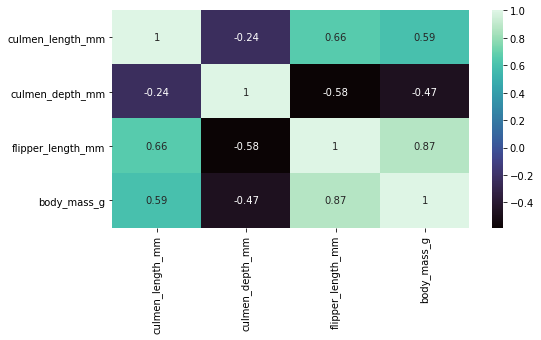

In [712]:
#plot heatmap of correlation
corr = df.corr()
axes = plt.subplots(figsize = (8, 4))
sns.heatmap(corr, cmap="mako", annot=True)

***Task 5:*** Produce a scatter plot that shows the relationship between body mass and flipper length as illustrated below. [0.5 mark]

[Text(0.5, 1.0, 'Body Mass vs Flipper Length'),
 Text(0.5, 0, 'Body Mass'),
 Text(0, 0.5, 'Flipper Length')]

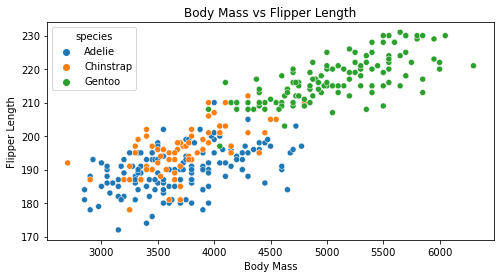

In [713]:
axes = plt.subplots(figsize = (8, 4))
g1 = sns.scatterplot(x='body_mass_g', y = 'flipper_length_mm', hue='species', data = df)
g1.set(title = 'Body Mass vs Flipper Length', xlabel='Body Mass', ylabel='Flipper Length') 

***Task 6:*** Display value counts for the species, island and sex. [0.75 mark]

In [714]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [715]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [716]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

***Task 7:*** Explore where the full stop comes from, display the corresponding row, replace the full stop by 'FEMALE', and then display the modified row again. [0.25 mark]

In [717]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [718]:
df.sex[df["sex"] == "."] = 'FEMALE'

In [719]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [720]:
df.iloc[[336]]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE


***Task 8:*** Apply one hot encoding to the categorical features 'sex' and 'island' and display the head of the resulting dataframe as illustrated below. [0.5 mark] 

In [721]:
from sklearn.preprocessing import OneHotEncoder

In [722]:
df2 = df.copy()
df2

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


In [723]:
# define one hot encoding
cat_encoder = OneHotEncoder(sparse=False)
# transform data
onehot = cat_encoder.fit_transform(df2[["sex","island"]])
colname = cat_encoder.get_feature_names(["sex","island"])
print(cat_encoder.categories_)
print(onehot)
print(colname)
cat_df =  pd.DataFrame(onehot, columns= colname)
cat_df

[array(['FEMALE', 'MALE'], dtype=object), array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]
[[0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 ...
 [0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]]
['sex_FEMALE' 'sex_MALE' 'island_Biscoe' 'island_Dream' 'island_Torgersen']


,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
339,0.0,1.0,1.0,0.0,0.0
340,1.0,0.0,1.0,0.0,0.0
341,0.0,1.0,1.0,0.0,0.0
342,1.0,0.0,1.0,0.0,0.0


In [724]:
df.drop(["sex","island"], axis=1, inplace=True)
df = df.join(cat_df)

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   culmen_length_mm   344 non-null    float64
 2   culmen_depth_mm    344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   sex_FEMALE         344 non-null    float64
 6   sex_MALE           344 non-null    float64
 7   island_Biscoe      344 non-null    float64
 8   island_Dream       344 non-null    float64
 9   island_Torgersen   344 non-null    float64
dtypes: float64(9), object(1)
memory usage: 27.0+ KB


In [726]:
cat_df.columns

Index(['sex_FEMALE', 'sex_MALE', 'island_Biscoe', 'island_Dream',
       'island_Torgersen'],
      dtype='object')

In [727]:
#Convert all one-hot encoded columns from float to int
for col in cat_df.columns:
    df[col] = df[col].astype(int)

In [728]:
num_cols = [cname for cname in df.columns 
                    if df[cname].dtype == "float64"]
num_cols

['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [729]:
#df['culmen_length_mm'] = df['culmen_length_mm'].apply(lambda x: float("{:.5f}".format(x)))

In [730]:
df.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.10,18.7,181.0,3750.0,0,1,0,0,1
1,Adelie,39.50,17.4,186.0,3800.0,1,0,0,0,1
2,Adelie,40.30,18.0,195.0,3250.0,1,0,0,0,1
3,Adelie,44.45,17.3,197.0,4050.0,0,1,0,0,1
4,Adelie,36.70,19.3,193.0,3450.0,1,0,0,0,1


In [731]:
# Your code goes here. 

***Task 9:*** Use value encoding ({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}) for the target variable ('species') and display the resulting dataframe as displayed below. [0.5 mark]

In [732]:
df.loc[(df.species == 'Adelie'),'species']= 0
df.loc[(df.species == 'Chinstrap'),'species']= 1
df.loc[(df.species == 'Gentoo'),'species']= 2
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,0,39.10,18.7,181.0,3750.0,0,1,0,0,1
1,0,39.50,17.4,186.0,3800.0,1,0,0,0,1
2,0,40.30,18.0,195.0,3250.0,1,0,0,0,1
3,0,44.45,17.3,197.0,4050.0,0,1,0,0,1
4,0,36.70,19.3,193.0,3450.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,2,44.45,17.3,197.0,4050.0,0,1,1,0,0
340,2,46.80,14.3,215.0,4850.0,1,0,1,0,0
341,2,50.40,15.7,222.0,5750.0,0,1,1,0,0
342,2,45.20,14.8,212.0,5200.0,1,0,1,0,0


In [733]:
# Your code goes here. 

## Machine Learning Algorithms

***Task 10:*** Use the train_test_split function of the sklearn library and split the independent variables and the target variable ('species') into a training set (80%) and into a test set (20%) and use random_state = 0 to make the solution reproducible. [0.5 mark]

In [734]:
# Your code goes here.
feature =  df.copy()
target = df["species"].copy()
feature.drop(["species"], axis=1, inplace=True)
feature

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,39.10,18.7,181.0,3750.0,0,1,0,0,1
1,39.50,17.4,186.0,3800.0,1,0,0,0,1
2,40.30,18.0,195.0,3250.0,1,0,0,0,1
3,44.45,17.3,197.0,4050.0,0,1,0,0,1
4,36.70,19.3,193.0,3450.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4050.0,0,1,1,0,0
340,46.80,14.3,215.0,4850.0,1,0,1,0,0
341,50.40,15.7,222.0,5750.0,0,1,1,0,0
342,45.20,14.8,212.0,5200.0,1,0,1,0,0


In [735]:
target

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: object

In [736]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(feature, target, test_size = 0.2, random_state = 0)

In [737]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

***Task 11:*** Use the KNeighborsClassifier (n_neighbors = 6) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [738]:
results = []
modelnames = []

In [739]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)


from sklearn.metrics import accuracy_score
modelnames.append('KNN-6')
result = accuracy_score(y_test, y_pred)*100
results.append(result)
print("Accuracy for KNN-6 model:", result)

Accuracy for KNN-6 model: 76.81159420289855


***Task 12:*** Use GridSearchCV function (with cv = 5) of the sklearn library and find the best value for the neighbors in the range from 1 to 20 for the KNeighborsClassifier and display the best value. [0.5 mark]

In [740]:
a = list(range(1,21,1))
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [741]:
#Setting hyperparameters
hyperparams = dict(n_neighbors= list(range(1,21,1)))

model = KNeighborsClassifier()

#Cross Validation for GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator= model, #model
    cv= 5, #cross Validation
    param_grid= hyperparams, #hyperparameters
    n_jobs=-1, #Use all available CPU cores
    verbose= 5 #Info
)
#Train across 5 folds, that's a total of (5*20) = 100 rounds of training.

grid_search.fit(X_train,y_train)
#grid_search.best_score_
grid_search.best_params_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


{'n_neighbors': 1}

In [742]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

modelnames.append('KNN-1')
result = accuracy_score(y_test, y_pred)*100
results.append(result)
print("Accuracy for KNN-1 model:", result)

Accuracy for KNN-1 model: 81.15942028985508


***Task 13:*** Use the SVC() classifier (with the parameters: kernel='poly', random_state=0), fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [743]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='poly', random_state=0)
SVC_model.fit(X_train,y_train)
y_pred = SVC_model.predict(X_test)

modelnames.append('SVC')
result = accuracy_score(y_test, y_pred)*100
results.append(result)
print("Accuracy for SVC model:", result)

Accuracy for SVC model: 76.81159420289855


***Task 14:*** Use the DecisionTreeClassifier (with the parameter: random_state=0) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [744]:
from sklearn.tree import DecisionTreeClassifier

In [745]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

modelnames.append('DCT')
result = accuracy_score(y_test, y_pred)*100
results.append(result)
print("Accuracy for DecisionTreeClassifier:", result)

Accuracy for DecisionTreeClassifier: 98.55072463768117


***Task 15:*** Use the RadomForestClassifier (with the parameter: random_state=0) of the sklearn library, fit the model, make predictions on the test set, and then calculate and display the accuracy score. [0.5 mark]

In [746]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

modelnames.append('RFC')
result = accuracy_score(y_test, y_pred)*100
results.append(result)
print("Accuracy for RandomForestClassifier:", result)

Accuracy for RandomForestClassifier: 100.0


***Task 16***: Now use the StandardScaler of the sklearn library and scale the independent variables and run the tasks 10-15 again. Describe in a "markdown" cell in no more than 150 words what different results you observe. [2.5 marks]

In [747]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#print(X_train)
#print(X_test)

In [748]:
#Setting hyperparameters
hyperparams = dict(n_neighbors= list(range(1,21,1)))

model = KNeighborsClassifier()

#Cross Validation for GridSearchCV
grid_search = GridSearchCV(
    estimator= model, #model
    cv= 5, #cross Validation
    param_grid= hyperparams, #hyperparameters
    n_jobs=-1, #Use all available CPU cores
    verbose= 5 #Info
)
#Train across 5 folds, that's a total of (5*20) = 100 rounds of training.

grid_search.fit(X_train,y_train)
#grid_search.best_score_
grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


{'n_neighbors': 2}

In [749]:
modelsSC = []
modelsSC.append(('KNN6', KNeighborsClassifier(n_neighbors=6)))
modelsSC.append(('KNN2', KNeighborsClassifier(n_neighbors=1)))
modelsSC.append(('SVC', SVC(kernel='poly', random_state=0)))
modelsSC.append(('DT', DecisionTreeClassifier(random_state = 0)))
modelsSC.append(('RFC', RandomForestClassifier(random_state=0)))
#print(models)

resultsSC = []
namesSC = []
for name, model in modelsSC:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = accuracy_score(y_test, y_pred)*100
    resultsSC.append(result)
    namesSC.append(name)
    print("Accuracy after StandardScaler:", name, result)

Accuracy after StandardScaler: KNN6 98.55072463768117
Accuracy after StandardScaler: KNN2 98.55072463768117
Accuracy after StandardScaler: SVC 98.55072463768117
Accuracy after StandardScaler: DT 98.55072463768117
Accuracy after StandardScaler: RFC 100.0


In [750]:
#Compare accuracy scores beforem and after using StandardScaler
data = list(zip(modelnames, results, resultsSC))
cols = ['Model', 'Accuracy before SC', 'Accuracy after SC']
performance = pd.DataFrame(data, columns=cols)
performance

,Model,Accuracy before SC,Accuracy after SC
0,KNN-6,76.811594,98.550725
1,KNN-1,81.159420,98.550725
2,SVC,76.811594,98.550725
3,DCT,98.550725,98.550725
4,RFC,100.000000,100.000000


In [751]:
# Your code goes here.

#### [150 words go here ...]